# Situações de atenção em Controle Estatístico de Processos

Este notebook apresenta uma introdução ao Controle Estatístico de Processos (CEP) aplicado à construção civil, com exemplos e gráficos ilustrando diferentes situações de pontos de atenção.

## Configuração do Processo
- **Média esperada:** 30 MPa
- **Desvio padrão:** 2 MPa
- **Número de amostras:** 50
- **Situações simuladas:**
  - Ponto fora do limite.
  - Sequência de sete pontos acima/abaixo da média.
  - Tendência ascendente.
  - Alternância de pontos.
  - Dois pontos consecutivos afastados 2/3 da linha central.
  - Quinze pontos concentrados em 1/3 da linha central.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Configurações gerais
np.random.seed(42)  # Para reprodutibilidade
media = 30  # Resistência média esperada do concreto (MPa)
desvio_padrao = 2  # Desvio padrão
n_amostras = 30  # 30 dias (uma amostra por dia)

# Limites de controle
LC = media
LCS = media + 3 * desvio_padrao
LCI = media - 3 * desvio_padrao

def plot_grafico(df, titulo, pontos_atencao):
    """Função para plotar o gráfico de controle destacando pontos de atenção."""
    plt.figure(figsize=(12, 6))
    plt.plot(df['Dia'], df['Resistência (MPa)'], marker='o', label='Resistência')
    plt.axhline(LC, color='green', linestyle='--', label='Linha Central (LC)')
    plt.axhline(LCS, color='red', linestyle='--', label='Limite Superior (LCS)')
    plt.axhline(LCI, color='red', linestyle='--', label='Limite Inferior (LCI)')
    
    # Destaque dos pontos de atenção
    plt.scatter(df.loc[pontos_atencao, 'Dia'], df.loc[pontos_atencao, 'Resistência (MPa)'], 
                color='red', label='Pontos de Atenção', zorder=5)
    
    plt.title(titulo)
    plt.xlabel('Dia')
    plt.ylabel('Resistência (MPa)')
    plt.legend()
    plt.grid()
    plt.show()

## Análise de Causas e Correções para Situações de Controle Estatístico de Processos



### **Situação 1: Um ou mais pontos fora do limite de controle**
- **Causa possível**:  
  Um erro grave no processo, como falhas na proporção de materiais (exemplo: excesso de cimento ou água) ou problemas na cura do concreto.
- **Correção**:  
  1. Revisar o lote específico para identificar a causa da anormalidade.  
  2. Ajustar os procedimentos de mistura e controle de qualidade.  
  3. Verificar a calibração dos equipamentos de medição.

---

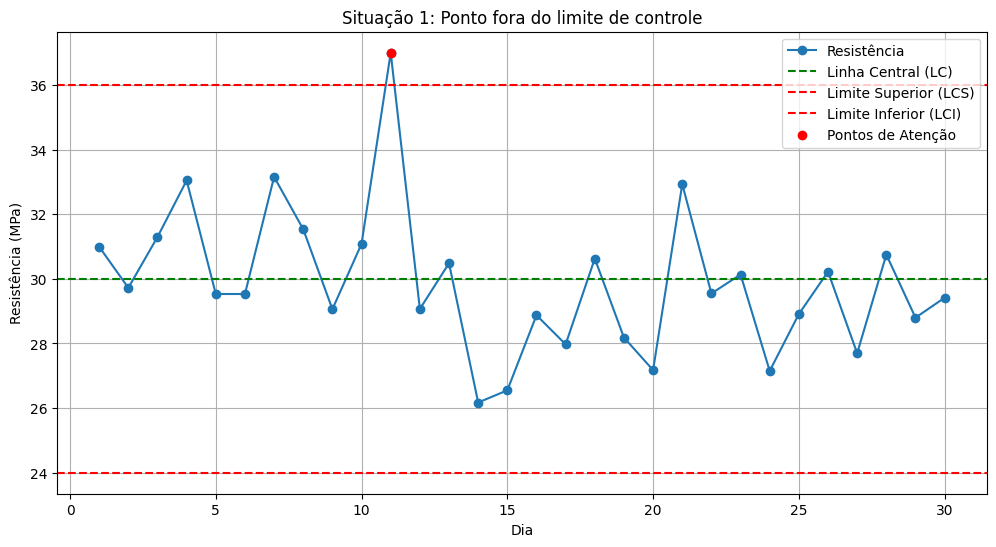

In [6]:
# Situação 1: Um ou mais pontos fora do limite de controle
dados = np.random.normal(media, desvio_padrao, n_amostras)
dados[10] = LCS + 1  # Ponto fora do limite superior
df1 = pd.DataFrame({'Dia': range(1, n_amostras + 1), 'Resistência (MPa)': dados})
pontos_atencao = [10]  # Índice do ponto fora do limite
plot_grafico(df1, 'Situação 1: Ponto fora do limite de controle', pontos_atencao)

# Contexto: Um lote de concreto apresentou resistência anormalmente alta devido a um erro na proporção de cimento.




### **Situação 2: Sete ou mais pontos consecutivos acima ou abaixo da média**
- **Causa possível**:  
  Alterações sistemáticas, como mudanças na qualidade dos materiais (cimento, agregados) ou condições ambientais (temperatura, umidade).  
- **Correção**:  
  1. Inspecionar os materiais e seus fornecedores.  
  2. Ajustar as condições ambientais do processo (exemplo: controle da temperatura na cura).  
  3. Implementar um plano de amostragem mais rigoroso.

---

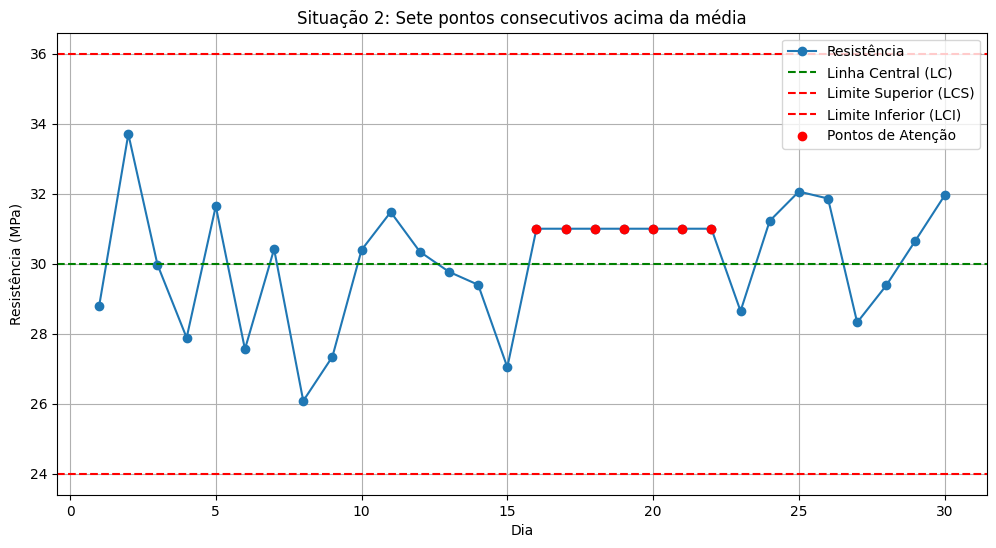

In [7]:
# Situação 2: Sete ou mais pontos consecutivos acima/abaixo da média
dados = np.random.normal(media, desvio_padrao, n_amostras)
dados[15:22] = media + 1  # Sete pontos acima da média
df2 = pd.DataFrame({'Dia': range(1, n_amostras + 1), 'Resistência (MPa)': dados})
pontos_atencao = list(range(15, 22))  # Índices dos sete pontos consecutivos
plot_grafico(df2, 'Situação 2: Sete pontos consecutivos acima da média', pontos_atencao)

# Contexto: Variações sistemáticas no processo de mistura causaram aumento contínuo na resistência.


### **Situação 3: Tendência ascendente**
- **Causa possível**:  
  Um acúmulo de erros, como excesso de cura, aumento gradativo na temperatura, ou erros na dosagem dos materiais.  
- **Correção**:  
  1. Monitorar as condições do ambiente e do processo ao longo do tempo.  
  2. Implementar verificações intermediárias durante a produção.  
  3. Ajustar os parâmetros do processo para evitar desvios contínuos.

---

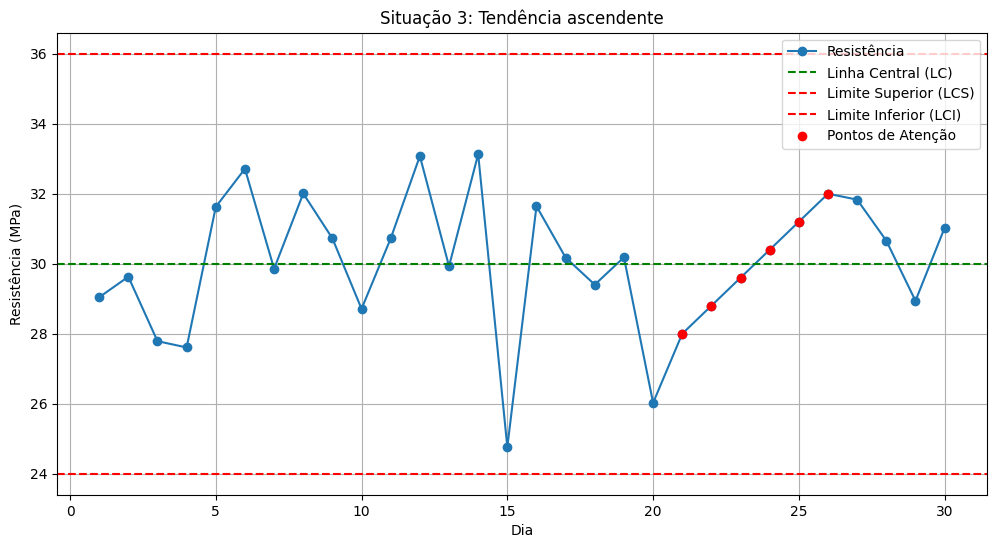

In [8]:
# Situação 3: Tendência ascendente
dados = np.random.normal(media, desvio_padrao, n_amostras)
dados[20:26] = np.linspace(media - 2, media + 2, 6)  # Tendência ascendente
df3 = pd.DataFrame({'Dia': range(1, n_amostras + 1), 'Resistência (MPa)': dados})
pontos_atencao = list(range(20, 26))  # Índices da tendência
plot_grafico(df3, 'Situação 3: Tendência ascendente', pontos_atencao)

# Contexto: O aumento gradual na resistência pode indicar excesso de cura do concreto.



### **Situação 4: Alternância de pontos**
- **Causa possível**:  
  Inconsistências no processo, como variações na proporção dos agregados ou inconsistências na homogeneidade da mistura.  
- **Correção**:  
  1. Padronizar os procedimentos de mistura e dosagem.  
  2. Treinar a equipe para evitar erros operacionais.  
  3. Revisar os equipamentos de mistura para garantir uniformidade.

---

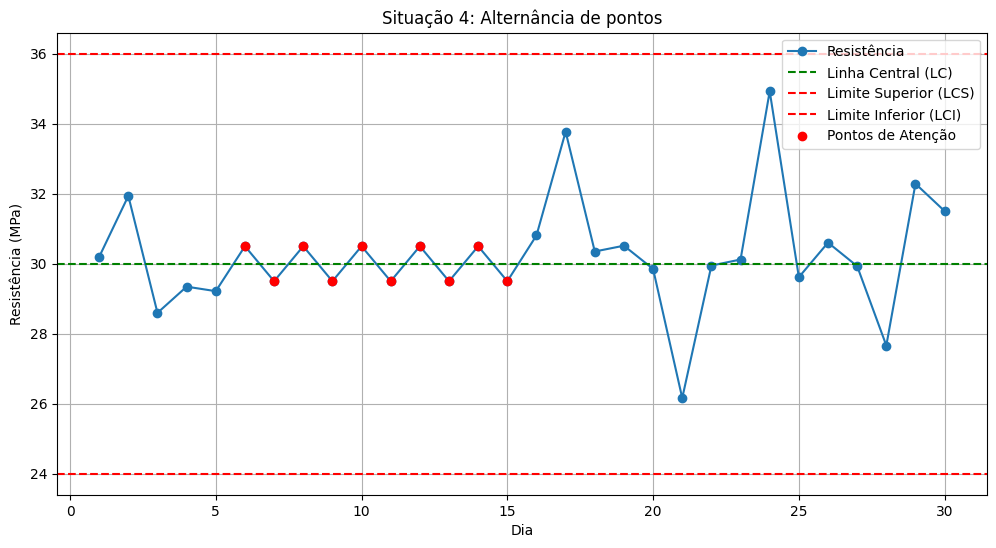

In [9]:
# Situação 4: Alternância de pontos
dados = np.random.normal(media, desvio_padrao, n_amostras)
alternancia = [media + (-1)**i * 0.5 for i in range(10)]  # Alternância corrigida para 10 pontos
dados[5:15] = alternancia
df4 = pd.DataFrame({'Dia': range(1, n_amostras + 1), 'Resistência (MPa)': dados})
pontos_atencao = list(range(5, 15))  # Índices dos pontos alternados
plot_grafico(df4, 'Situação 4: Alternância de pontos', pontos_atencao)

# Contexto: Alternância pode ser causada por inconsistências na proporção de agregados.



### **Situação 5: Dois pontos consecutivos afastados 2/3 da linha central**
- **Causa possível**:  
  Problemas pontuais em um lote de concreto, como diferenças na granulometria dos agregados ou variações no teor de umidade.  
- **Correção**:  
  1. Verificar a umidade dos agregados antes do uso.  
  2. Ajustar a proporção de água no processo com base na condição dos materiais.  
  3. Analisar os dados de controle para evitar repetição da ocorrência.

---

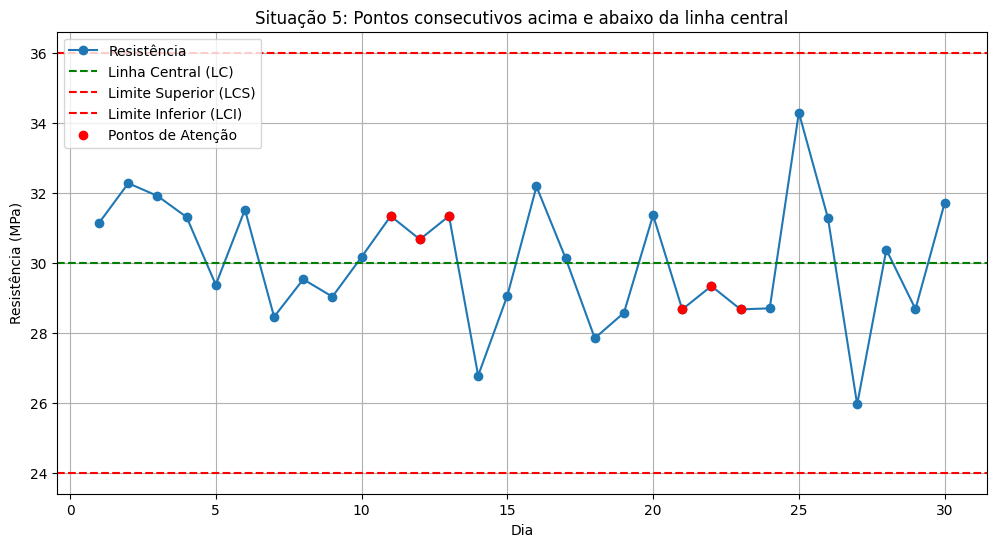

In [13]:
# Situação 5: Três pontos consecutivos acima e abaixo da linha central
dados = np.random.normal(media, desvio_padrao, n_amostras)

# Definindo os pontos de atenção acima da linha central
dados[10:13] = [LC + (2/3) * desvio_padrao, LC + (1/3) * desvio_padrao, LC + (2/3) * desvio_padrao]

# Definindo os pontos de atenção abaixo da linha central
dados[20:23] = [LC - (2/3) * desvio_padrao, LC - (1/3) * desvio_padrao, LC - (2/3) * desvio_padrao]

# Criando o DataFrame
df5_combinado = pd.DataFrame({'Dia': range(1, n_amostras + 1), 'Resistência (MPa)': dados})

# Índices dos pontos de atenção
pontos_atencao_combinado = list(range(10, 13)) + list(range(20, 23))

# Gerar o gráfico com ambas situações
plot_grafico(df5_combinado, 
             'Situação 5: Pontos consecutivos acima e abaixo da linha central', 
             pontos_atencao_combinado)


### **Situação 6: Quinze ou mais pontos em 1/3 da linha central**
- **Causa possível**:  
  O processo pode estar preso a uma faixa limitada de variação, indicando restrições nas condições de produção ou um ajuste muito conservador.  
- **Correção**:  
  1. Reavaliar os limites de controle para garantir que são adequados ao processo.  
  2. Verificar a capacidade do processo (CPk) para identificar restrições.  
  3. Introduzir melhorias contínuas para aumentar a estabilidade e reduzir variações.

---

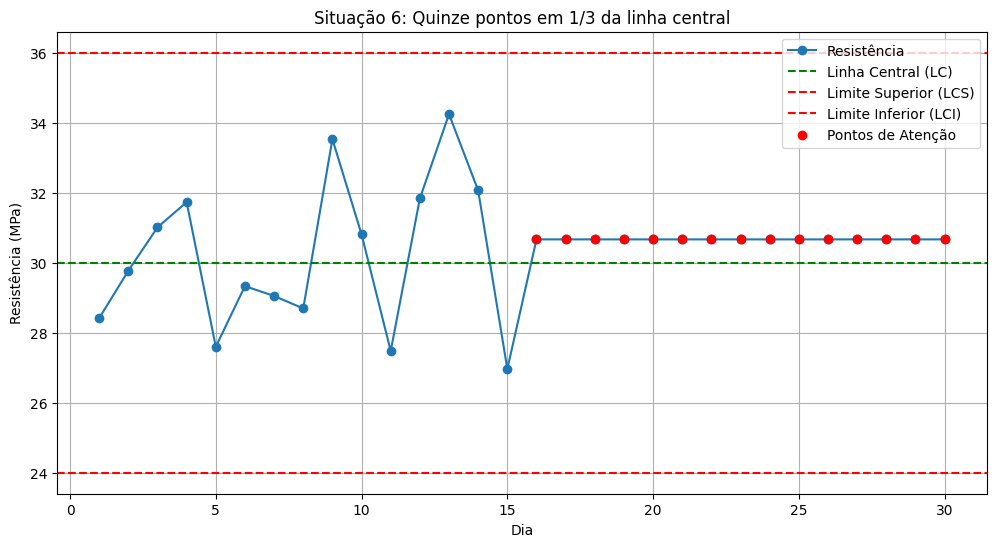

In [14]:
# Situação 6: Quinze pontos em 1/3 da linha central
dados = np.random.normal(media, desvio_padrao, n_amostras)
dados[15:30] = LC + (1/3) * desvio_padrao  # Quinze pontos concentrados
df6 = pd.DataFrame({'Dia': range(1, n_amostras + 1), 'Resistência (MPa)': dados})
pontos_atencao = list(range(15, 30))  # Índices dos pontos concentrados
plot_grafico(df6, 'Situação 6: Quinze pontos em 1/3 da linha central', pontos_atencao)

# Contexto: Pode indicar que o processo está preso a uma faixa limitada da variação aceitável.


### **Conclusão**
Cada situação indica uma falha potencial no processo de controle estatístico. As ações sugeridas permitem investigar, corrigir e prevenir ocorrências semelhantes, melhorando a qualidade e a consistência do produto final na construção civil.

## Conclusão
Cada gráfico demonstra uma situação específica que requer atenção no Controle Estatístico de Processos. Alterando os dados simulados, você pode testar e visualizar novos cenários.